In [321]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import seaborn as sns


In [322]:
# Create Tickers
tickers = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'NVDA']

In [323]:
infos = []
for i in tickers:
    infos.append(yf.Ticker(i).info)
    

In [324]:
infos 


[{'address1': 'One Apple Park Way',
  'city': 'Cupertino',
  'state': 'CA',
  'zip': '95014',
  'country': 'United States',
  'phone': '408 996 1010',
  'website': 'https://www.apple.com',
  'industry': 'Consumer Electronics',
  'industryKey': 'consumer-electronics',
  'industryDisp': 'Consumer Electronics',
  'sector': 'Technology',
  'sectorKey': 'technology',
  'sectorDisp': 'Technology',
  'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, 

In [325]:
# Create dataFrame
df = pd.DataFrame(infos)
df 

,address1,city,state,zip,country,phone,website,industry,industryKey,industryDisp,...,returnOnEquity,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio
0,One Apple Park Way,Cupertino,CA,95014,United States,408 996 1010,https://www.apple.com,Consumer Electronics,consumer-electronics,Consumer Electronics,...,1.54269,86563127296,116433002496,0.160,0.021,0.45027,0.33733,0.33764,USD,2.2441
1,1600 Amphitheatre Parkway,Mountain View,CA,94043,United States,650 253 0000,https://abc.xyz,Internet Content & Information,internet-content-information,Internet Content & Information,...,0.27356,58657751040,101745999872,0.560,0.135,0.56937,0.32587,0.28849,USD,1.3452
2,410 Terry Avenue North,Seattle,WA,98109-5210,United States,206 266 1000,https://www.aboutamazon.com,Internet Retail,internet-retail,Internet Retail,...,0.17490,45475749888,84946001920,50.693,0.139,0.46982,0.14878,0.07525,USD,2.3585
3,One Microsoft Way,Redmond,WA,98052-6399,United States,425 882 8080,https://www.microsoft.com,Software - Infrastructure,software-infrastructure,Software - Infrastructure,...,0.39174,58680999936,102646996992,0.332,0.176,0.69815,0.52037,0.43586,USD,2.3547
4,2788 San Tomas Expressway,Santa Clara,CA,95051,United States,408 486 2000,https://www.nvidia.com,Semiconductors,semiconductors,Semiconductors,...,0.69173,14114499584,18838999040,12.741,2.055,0.69853,0.49389,0.57489,USD,0.7121


In [326]:
# replace index with symbol 
df = df.set_index('symbol') 
df

,address1,city,state,zip,country,phone,website,industry,industryKey,industryDisp,...,returnOnEquity,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio
symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,One Apple Park Way,Cupertino,CA,95014,United States,408 996 1010,https://www.apple.com,Consumer Electronics,consumer-electronics,Consumer Electronics,...,1.54269,86563127296,116433002496,0.160,0.021,0.45027,0.33733,0.33764,USD,2.2441
GOOGL,1600 Amphitheatre Parkway,Mountain View,CA,94043,United States,650 253 0000,https://abc.xyz,Internet Content & Information,internet-content-information,Internet Content & Information,...,0.27356,58657751040,101745999872,0.560,0.135,0.56937,0.32587,0.28849,USD,1.3452
AMZN,410 Terry Avenue North,Seattle,WA,98109-5210,United States,206 266 1000,https://www.aboutamazon.com,Internet Retail,internet-retail,Internet Retail,...,0.17490,45475749888,84946001920,50.693,0.139,0.46982,0.14878,0.07525,USD,2.3585
MSFT,One Microsoft Way,Redmond,WA,98052-6399,United States,425 882 8080,https://www.microsoft.com,Software - Infrastructure,software-infrastructure,Software - Infrastructure,...,0.39174,58680999936,102646996992,0.332,0.176,0.69815,0.52037,0.43586,USD,2.3547
NVDA,2788 San Tomas Expressway,Santa Clara,CA,95051,United States,408 486 2000,https://www.nvidia.com,Semiconductors,semiconductors,Semiconductors,...,0.69173,14114499584,18838999040,12.741,2.055,0.69853,0.49389,0.57489,USD,0.7121


In [327]:
# Select columns you would like to extract 
fundamentals = ['marketCap', 'beta', 'trailingPE', 'dividendYield', 'returnOnEquity', 'profitMargins', 'revenueGrowth', 'quickRatio', 'returnOnAssets', 'totalRevenue', 'trailingEps']
df[df.columns[df.columns.isin(fundamentals)]] 

,dividendYield,beta,trailingPE,marketCap,profitMargins,trailingEps,quickRatio,totalRevenue,returnOnAssets,returnOnEquity,revenueGrowth
symbol,,,,,,,,,,,
AAPL,0.0053,1.312,28.309006,2815212650496,0.26163,6.44,0.920,385706000384,0.21181,1.54269,0.021
GOOGL,NaN,1.058,24.227587,1754293862400,0.24007,5.80,1.942,307393986560,0.14366,0.27356,0.135
AMZN,NaN,1.142,58.451720,1760768032768,0.05293,2.90,0.807,574784995328,0.04651,0.17490,0.139
MSFT,0.0074,0.899,36.500454,3002343620608,0.36269,11.07,1.096,227583000576,0.15190,0.39174,0.176
NVDA,0.0002,1.684,96.176155,1793541144576,0.42097,7.55,2.922,44870000640,0.27228,0.69173,2.055


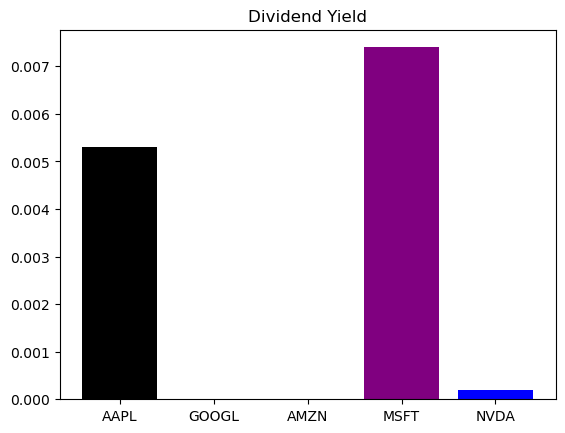

In [328]:
## Dividend distribution in 2023 
## From the bar plot below, it is noted that companies Microsoft was provided highest dividend level as compared to others. Apple was the second highes.
plt.bar(df.index, df['dividendYield'], color=('k', 'orange', 'brown', 'purple', 'blue'))
plt.title('Dividend Yield')
plt.show()


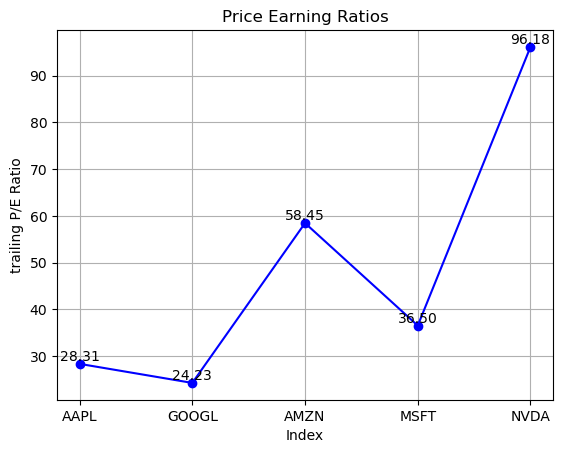

In [347]:
# Price Earning Ratios in 2023 
## From the line plot below, it is noted that NVIDIA had the highest price earning ratio followed by Microsoft.
plt.plot(df.index, df['trailingPE'], marker='o', linestyle='-', color='b')
plt.xlabel('Index')  # Using default index as x-axis label
plt.ylabel('trailing P/E Ratio')
plt.title('Price Earning Ratios')
plt.grid(True)  # Add grid lines

# Add value labels to each data point
for i, value in enumerate(df['trailingPE']):
    plt.text(df.index[i], value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

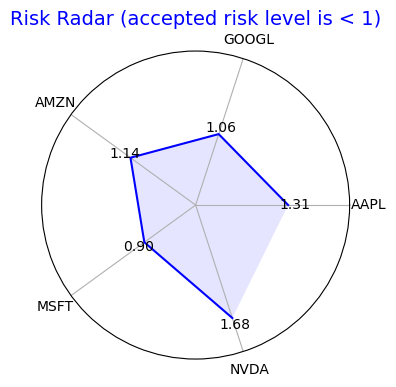

In [330]:
##### In the following radar plot, beta values are populated. From the values it can be easily seen that Microsoft tends to be more stable and may provide more consistent returns than the market during turbulent times. 
## Google is the just above or near to 1 (1.06 beta values). That means Google stocks tend to move in line with the market. 
## Rest other three companies poses risk. NVIDIA has the highest risk. For example if the market goes up by 1%, the stock might go up by more than 1%, and if the market goes down by 1%, the stock might decline by more than 1%.

# Extract beta values from the DataFrame
beta_values = df['beta'].tolist()

# Create a radar chart
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))

# Ensure the number of theta values matches the number of tickers
theta = np.linspace(0, 2*np.pi, len(beta_values), endpoint=False)

# Fill the area under the radar chart
ax.fill(theta, beta_values, 'b', alpha=0.1)

# Plot the radar chart lines
ax.plot(theta, beta_values, color='b')

# Set the y-axis limits based on the range of beta values
ax.set_ylim(0, max(beta_values) + 0.5)

# Set the company labels
ax.set_thetagrids(theta * 180/np.pi, df.index)

# Remove the radial tick labels (0.25, 0.50, 0.75, etc.)
ax.set_rgrids([])

# Add beta value labels for each company
for i, (angle, label) in enumerate(zip(theta, beta_values)):
    ax.text(angle, label + 0.1, f'{label:.2f}', ha='center', va='center')

plt.title('Risk Radar (accepted risk level is < 1)', size=14, color='b')  # Add a title

plt.show()


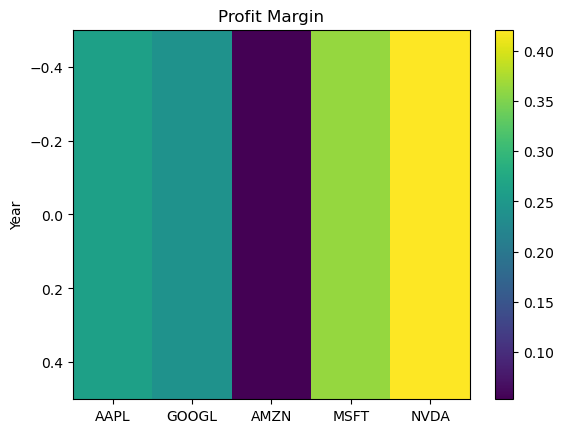

In [331]:
# Create Profit Margin Heat Map 
plt.imshow(df[['profitMargins']].T, cmap='viridis', aspect='auto')
plt.colorbar()
plt.ylabel('Year')
plt.title('Profit Margin')

# Set x-ticks and labels for company names
plt.xticks(range(len(df.index)), df.index)


plt.show()

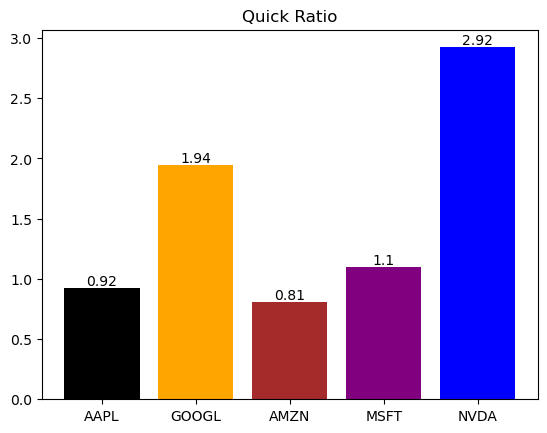

In [332]:
# Calculate Quick Ratio

plt.bar(df.index, df['quickRatio'], color=('k', 'orange', 'brown', 'purple', 'blue'))
plt.title('Quick Ratio')
# Add value labels
for i, ratio in enumerate(df['quickRatio']):
    plt.text(i, ratio, str(round(ratio, 2)), ha='center', va='bottom')

plt.show()

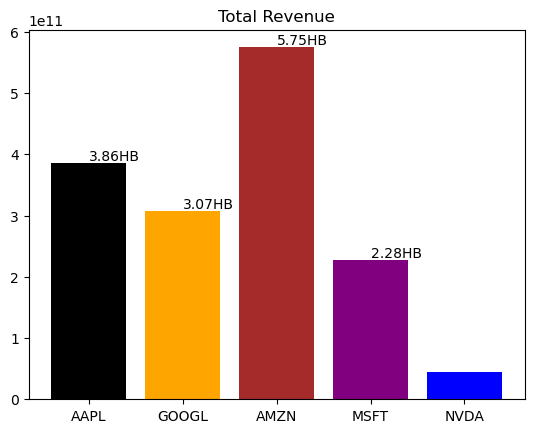

In [333]:
# Define a function to format the value labels
def format_value_label(value):
    if abs(value) >= 1e11:
        return '{:.2f}HB'.format(value / 1e11)   # Hundred Billion


# Create the bar plot
bars = plt.bar(df.index, df['totalRevenue'], color=('k', 'orange', 'brown', 'purple', 'blue'))

# Add formatted value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, format_value_label(yval), va='bottom')

# Set the title
plt.title('Total Revenue')

# Show the plot
plt.show()


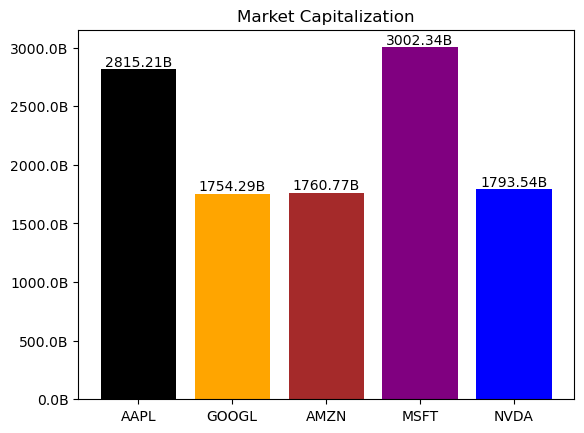

In [334]:
import matplotlib.ticker as ticker

# Function to format numbers in billions with one decimal place
def format_billions(x, pos):
    return f'{x/1e9:.1f}B'

# Assuming df is your DataFrame containing company data

bars = plt.bar(df.index, df['marketCap'], color=('k', 'orange', 'brown', 'purple', 'blue'))
plt.title('Market Capitalization')

# Add formatted value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval/1e9:.2f}B', ha='center', va='bottom')

# Format y-axis ticks to be more readable
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_billions))

plt.show()


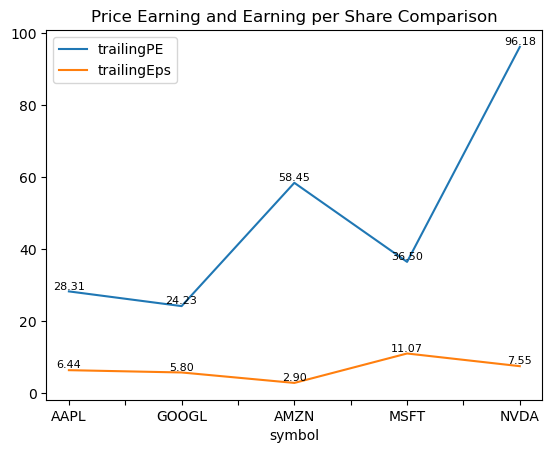

In [335]:
# Filter the DataFrame to include only 'trailingPE' and 'trailingEps' columns
fundamentals = ['marketCap', 'beta', 'trailingPE', 'dividendYield', 'returnOnEquity', 'profitMargins', 'revenueGrowth', 'quickRatio', 'returnOnAssets', 'totalRevenue', 'trailingEps']
data_to_plot = df[df.columns[df.columns.isin(fundamentals)]]

# Plot the data for 'trailingPE' and 'trailingEps'
ax = data_to_plot[['trailingPE', 'trailingEps']].plot()

# Add value labels for each company
for i, company in enumerate(data_to_plot.index):
    for col in ['trailingPE', 'trailingEps']:
        value = data_to_plot.loc[company, col]
        ax.text(i, value, f"{value:.2f}", ha='center', va='bottom', fontsize=8)

# Add labels and title to the plot
plt.title('Price Earning and Earning per Share Comparison')

# Display the plot
plt.show()


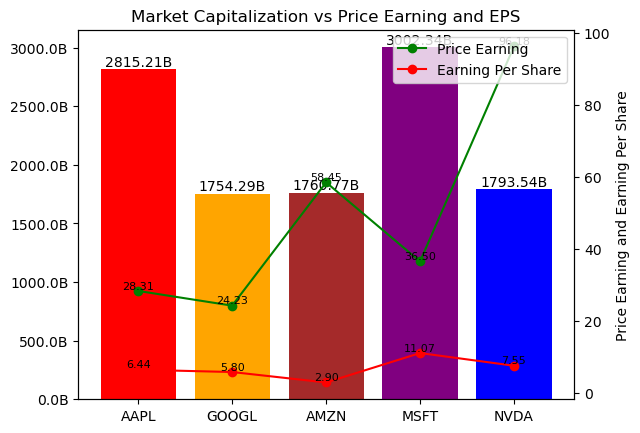

In [344]:
# Combine Visuals for Market Capitalizations, Earning Per Share and Price Earning 

# Function to format numbers in billions with one decimal place
def format_billions(x, pos):
    return f'{x/1e9:.1f}B'

# Add subplots
fig, ax = plt.subplots()

# Plot market capitalization
bars = ax.bar(df.index, df['marketCap'], color=('red', 'orange', 'brown', 'purple', 'blue'))
ax.set_title('Market Capitalization vs Price Earning and EPS')

# Add formatted value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval/1e9:.2f}B', ha='center', va='bottom')

# Plot Price Earning and Earning Per Share on secondary y-axis
ax2 = ax.twinx()
line1 = ax2.plot(df.index, df['trailingPE'], color='green', marker='o', label='Price Earning')
line2 = ax2.plot(df.index, df['trailingEps'], color='red', marker='o', label='Earning Per Share')
ax2.set_ylabel('Price Earning and Earning Per Share')

# Add value labels for trailingPE
for i, val in enumerate(df['trailingPE']):
    ax2.text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=8)

# Add value labels for trailingEps
for i, val in enumerate(df['trailingEps']):
    ax2.text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=8)

# Show legend for trailingPE and trailingEps
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper right')

# Format y-axis ticks for market cap using the defined formatter function
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_billions))

plt.show()
